In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from keras.models import load_model
model = load_model('/data/dfc13/DoublePulse/Models/Arch01/DP_model_6006.h5')
model.summary()

Using TensorFlow backend.
W1217 16:06:11.807937 140143614334720 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1217 16:06:11.840543 140143614334720 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1217 16:06:11.860670 140143614334720 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1217 16:06:11.905974 140143614334720 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 251, 51, 32)       16032     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 25, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 101, 21, 64)       256064    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 8, 32)         92192     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 4, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [3]:
data_ec = np.load('/fastio2/dasha/double_pulse/data_NuECC.npy', mmap_mode='r')

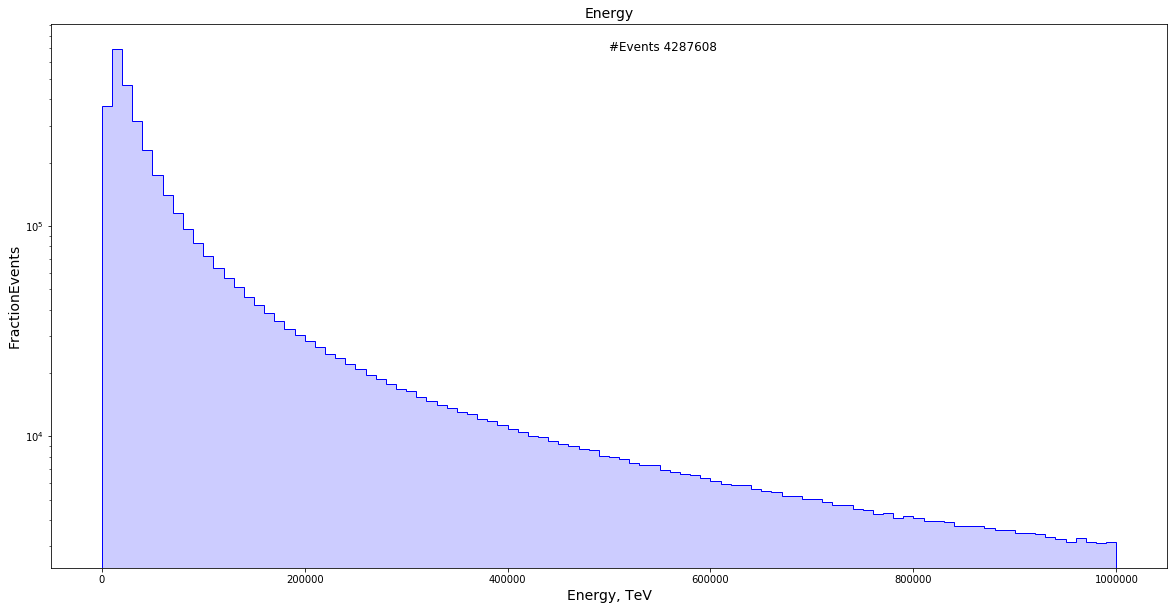

In [5]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Energy", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Energy, TeV', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data_ec['neutrino']['energy'], bins =100,  histtype = 'step',edgecolor ='b', lw =1, fill=True, fc=(0, 0, 1, 0.2), range = [0,1000000], label = "Nu")  
plt.show()

In [7]:
mean = 0.0008596053 
std = 0.011836949
print(mean, std)

0.0008596053 0.011836949


In [ ]:
preds = []
for im in data_ec['image']:
    im = im.reshape(1,300,60,1)
    im = (im-mean)/std
    pred = model.predict(im)
    preds.append(pred)
preds = np.array(preds)
print(len(preds),preds[0])

In [ ]:
np.save('/fastio2/dasha/double_pulse/preds_NuECC.npy', preds)

In [13]:
preds = np.load('/fastio2/dasha/double_pulse/preds_NuECC.npy')
print(preds[0:10])

[[[0.8157125  0.1842875 ]]

 [[0.63561565 0.36438435]]

 [[0.69885796 0.30114207]]

 [[0.7894699  0.2105301 ]]

 [[0.6711467  0.3288533 ]]

 [[0.33934262 0.6606574 ]]

 [[0.52063906 0.47936094]]

 [[0.65494996 0.3450501 ]]

 [[0.7735043  0.2264957 ]]

 [[0.6228311  0.37716886]]]
